Once deleted, variables cannot be recovered. Proceed (y/[n])? y


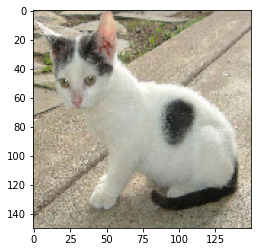

(150, 150, 3)
(1, 150, 150, 3)


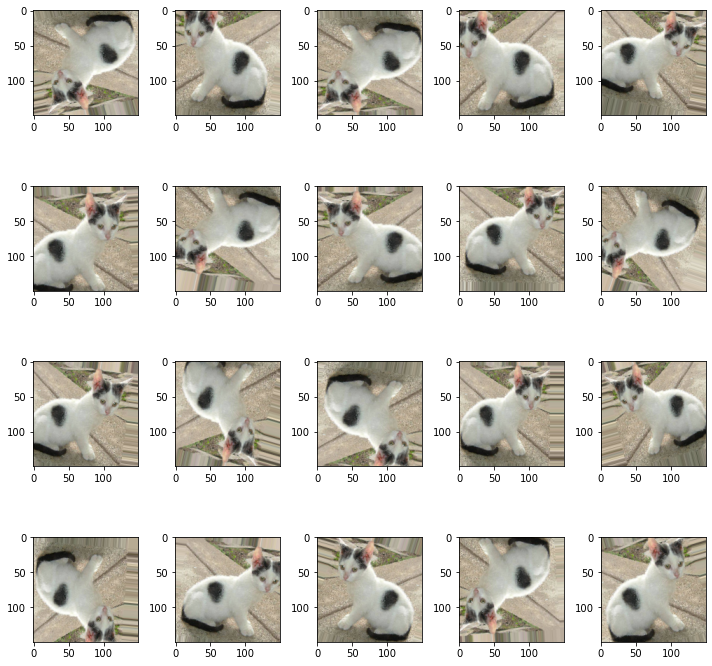

In [8]:
%reset
%matplotlib inline

# data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

img = image.load_img('./data/cat_dog_small/train/cats/cat.3.jpg',
                    target_size=(150,150))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
print(x.shape)  # (150,150,3)
x = x.reshape((1,) + x.shape)
print(x.shape)

fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))
    
idx = 0
for batch in datagen.flow(x,
                          batch_size=1):
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break;

fig.tight_layout()
plt.show()